<div align="center" style="color: #2471A3; font-size: 30px; font-weight: bold;">Maximum k cut</div>

<div align="right" style="font-size: 15px; font-weight: normal;">Claudia Zendejas Morales</div>

<a href="https://opensource.org/licenses/Apache-2.0"></a>

# Contents

1. [Introduction](#intro)
    1. [Optimization Problem](#intro.optp)
    2. [Maximum Cut Problem](#intro.maxcut)
    3. [Maximum K Cut Problem](#intro.maxkcut)
    4. [Graph Coloring Problem](#intro.graphcol)
2. [Max-k-cut - Quantum Implementation with Qiskit](#quantum)
    1. [Max-k-cut as Graph Coloring](#quantum.mkc.gc)
    2. [Graph Coloring as a QUBO Problem](#quantum.gc.qubo)
    3. [Qiskit Optimization Module](#quantum.module.opt)
    4. [Converters for Quadratic Programs](#quantum.converters)
    5. [Max-cut with Qiskit](#quantum.mcqiskit)
    6. [Max-k-cut implementation](#quantum.mkcimpl)
    7. [Max-k-cut Example](#quantum.mkcimpl.ex)
        1. [Solve with `NumPyMinimumEigensolver`](#quantum.solving.classic)
        2. [Solve with `QAOA`](#quantum.solving.qaoa)
        3. [Solve with `VQE`](#quantum.solving.vqe)
        4. [Bigger Example](#quantum.solving.bigger)
3. [Applications](#apps)
4. [Conclusions](#conclusions)
5. [References](#refs)

$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $

<a id="intro"></a>
# Introduction

As humans, we constantly seek solutions, and our reasoning has led us to go further, and seek not only a solution, but an optimal solution, because we have learned that it is convenient for us to optimize the resources at our disposal.

That is why, over time, we have developed theories to help us find those optimal solutions to complex problems such as combinatorial problems, which can become so complex that it is not enough to pose the problem with paper and pencil, but we must use the computational resources that we have today.

Many problems in quantitative fields such as finance and engineering are optimization problems. Optimization problems lie at the core of complex decision-making and definition of strategies.

Optimization (or combinatorial optimization) means searching for an optimal solution in a finite or countably infinite set of potential solutions. Optimality is defined with respect to some criterion function, which is to be minimized or maximized. This is typically called cost function or objective function.

#### Typical optimization problems

- **Minimization**: cost, distance, length of a traversal, weight, processing time, material, energy consumption, number of objects

- **Maximization**: profit, value, output, return, yield, utility, efficiency, capacity, number of objects


<a id="intro.optp"></a>
## Optimization Problem

In mathematics, computer science, and economics, an optimization problem is the problem of finding the best solution from all feasible solutions.

The standard form of an optimization problem is

\begin{align*}
\texttt{minimize} \;\;\; &f(x)\\
\texttt{subject to} \;\;\; &g_i(x)\leq 0, \;\;\;\; i = 1,\cdots ,m\\
&h_j(x)=0, \;\;\;\; j = 1,\cdots ,p
\end{align*}

Where,

- $f:\mathbb{R}^n\rightarrow\mathbb{R}$ is the **objective function** (or cost function) to be minimized over the vector $x$ of $n$ variables
- $g_i(x)\leq 0$ are called inequality constraints
- $h_j(x)= 0$ are called equality constraints
- $m\geq 0$ and $p\geq 0$

If $m=p=0$ the problem is an unrestricted optimization. By convention, the standard form defines a *minimization problem*. A *maximization problem* can be addressed by multiplying the objective function by $-1$.

<a id="intro.maxcut"></a>
## Maximum Cut Problem

Given an undirected graph $G=(V, E)$, a cut in $G$ is a subset $S\subseteq V$. Let $\overline{S}=V\setminus S$, and let $E(S, \overline{S})$ denote the set of edges with one vertex in $S$ and one vertex in $\overline{S}$. We will use the term "cut" to refer variously to the partition $(S, \overline{S})$ of the vertices, and also the set of edges $E(S, \overline{S})$ crossing between $S$ and $\overline{S}$. The Max-Cut problem is to find the cut $S$ that maximizes $|E(S, \overline{S})|$. In the weighted version of Max-Cut, we are also given an edge weight function $w: \; E\rightarrow\mathbb{R}$, and the problem is to find a cut with maximum weight.

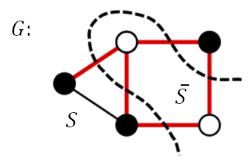

### Weighted Max-cut

Consider an $n$-node undirected graph $G = (V, E)$ where $|V| = n$ with edge weights $w_{ij}>0$, $w_{ij}=w_{ji}$, for $(i, j)\in E$. A cut is defined as a partition of the original set $V$ into two subsets. The cost function to be optimized is in this case the sum of weights of edges connecting points in the two different subsets, *crossing* the cut. By assigning $x_i=0$ or $x_i=1$ to each node $i$, one tries to maximize the global profit function (summation run over indices $0,1,...n-1$).

$$\tilde{C}(\textbf{x}) = \sum_{i,j} w_{ij} x_i (1-x_j)$$

<a id="intro.maxkcut"></a>
## Maximum K Cut Problem

In the Max-k-Cut problem, we are also given an undirected graph, $G=(V, E)$, with non-negative edge weights. Our objective is to divide the vertices into at most $k$ disjoint sets, for some given positive integer $k$, to maximize the weight of the edges whose endpoints lie in different sets. When $k=2$, this problem is known simply as the Max-cut problem.

We assume without loss of generality that the graph $G = (V,E)$ is a complete graph because missing edges can be added with a corresponding weight of zero. Let $k \geq 2$ and define the matrix variable $X = (X_{ij})$, $i, j \in V$, as:

$$X_{ij}=\begin{cases}
      -\frac{1}{k-1} & \text{if vertices $i$ and $j$ are in different partitions of the k-cut of $G$,} \\
      \; \; \; \; 1 & \text{otherwise}
    \end{cases}$$

The max-k-cut problem on $G$ can be expressed as:

\begin{align*}
\texttt{maximize} \;\;\; &\sum_{i,j \, \in \, V \; , \; i<j} \; w_{ij} \, \frac{\left(k-1\right) \, \left(1-X_{ij}\right)}{k}\\\\
\texttt{subject to} \;\;\; &X_{ii}=1, \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \forall \; i \; \in \; V,\\
&X_{ij} \ \in \ \left\{-\frac{1}{k-1}, \; 1\right\}, \;\;\;\; \forall \; i,j \; \in \; V, \; i<j,\\
&X\geq 0
\end{align*}

<a id="intro.graphcol"></a>
## Graph Coloring Problem

Graph coloring is a way of labeling the vertices of a graph with colors such that no two adjacent vertices are assigned the same color. A coloring using at most $k$ different labels is called a $k$-coloring, and the smallest number of colors needed
to color a graph $G$ is called its chromatic number.

Let $G = (V, E)$ be a simple undirected graph with the vertex set $V$ and the edge set $E$. Let $|V| = n$, and let $k$ be a given integer such that $1 \leq k \leq n − 1$. We say that $G$ is $k$-colorable if one can assign to each vertex in $G$ one of the $k$ colors such that adjacent vertices do not have the same color.

The convention of using colors originates from coloring the countries of a map, where each face is literally colored. This was generalized to coloring the faces of a graph embedded in the plane. By planar duality it became coloring the vertices, and in this form it generalizes to all graphs. In mathematical and computer representations, it is typical to use the first few positive or non-negative integers as the "colors". In general, one can use any finite set as the "color set". The nature of the coloring problem depends on the number of colors but not on what they are.

<a id="quantum"></a>
# Max-k-cut - Quantum Implementation with Qiskit

<a id="quantum.mkc.gc"></a>
## Max-k-cut as Graph Coloring

The graph coloring problem for $k$-colorable subgraphs can be seen as a special case of the max-k-cut problem. In the max-k-cut problem, the goal is to assign $k$ colors to the vertices of a given graph to maximize the weight of the edges (edges where both endpoints have the same color). Note that a $k$-colorable graph allows a $k$-cut where there are no ‘defect edges’ (with endpoints of the same color) [[E. de Klerk, et. al.](https://doi.org/10.1023/B:JOCO.0000038911.67280.3f)].

This is why I take the work called "*Quantum Optimization for the Graph Coloring Problem with Space-Efficient Embedding*" [[Zsolt Tabi, et. al](https://doi.org/10.1109/QCE49297.2020.00018)] to implement the solution to the **max-k-cut** problem using the **Qiskit** library. The approach is to follow the guidelines of the already existing `Maxcut` class.

 <a id="quantum.gc.qubo"></a>
## Graph Coloring as a QUBO Problem

[QUBO](https://en.wikipedia.org/wiki/Quadratic_unconstrained_binary_optimization) is a standard model in optimization theory that is frequently used in quantum computing as it can serve as an input for algorithms like the Quantum Approximate Optimization Algorithm ([QAOA](https://en.wikipedia.org/wiki/Quantum_optimization_algorithms)) or Quantum Annealing ([QA](https://en.wikipedia.org/wiki/Quantum_annealing)). The general form of QUBO problems is the minimization of $f:\{0, 1\}^N\rightarrow\mathbb{R}$, the pseudo-Boolean objective function of the following form:

\begin{align*}
\texttt{minimize} \;\;\; f(x)&=x^TQx=\sum_{i,j=1}^{N} \, Q_{ij}x_ix_j\\\\
x^*&=\underset{x\in\{0,1\}^N}{\texttt{arg min}} \; f(x),
\end{align*}


where $Q$ is a real symmetric matrix, $f$ is often called the cost function and $x^∗$ is referred to as a solution bit string or a global minimizer of $f$. Such a QUBO problem is equivalent to finding the groundstate energy and configurations of the following $N$-qubit Ising Hamiltonian:

$$H=\sum_{i,j=1}^{N} \, Q_{i,j}\left(\mathbb{1}-Z_i\right)\left(\mathbb{1}-Z_j\right)$$

where $Z_k$ denotes the operator that acts as the Pauli-$Z$ gate on the $k$th qubit and as identity on the other qubits.

The coloring problem, similarly to several other families of NP-complete problems, can be naturally formulated as a QUBO problem. The QUBO description of the $k$-coloring problem for a graph with $n$ nodes uses $N = n\cdot k$ number of bits. The bits $x_{v,i}$ in this formulation have double labels $(v, i)$, where $v \in {1, . . . , n}$ labels the vertices and $i \in {1, . . . , k}$ labels the colors. One uses a **one-hot encoding**, i.e., if vertex $v$ is assigned the color $j$ we set $x_{v,j} = 1$ and for all $i \neq j$ we set $x_{v,i} = 0$. To ensure that the solution of the QUBO will satisfy such a one-hot encoding requirement, one employs a penalty term for each vertex $v$ of the form $\left(1 − \sum_{i=1}^{k}x_{v,i}\right)^2$. Next, for all pairs $(v, w)$ of neighboring sites, one penalizes the same-color assignments by the term $\sum_{i=1}^{k}x_{v,i}x_{w,i}$. Thus, in total, the cost function for the $k$-coloring of a graph with n nodes and adjacency matrix $A$ can be written as follows [[Zsolt Tabi, et. al](https://doi.org/10.1109/QCE49297.2020.00018)]:

$$f(x)=C\sum_{v=1}^{n}\left(1-\sum_{i=1}^{k}x_{v,i}\right)^2+D\sum_{v,w=1}^{n}\sum_{i=1}^{k}A_{vw}x_{v,i}x_{w,i}  \tag{1}$$


where $C$ and $D$ can be arbitrary positive numbers. The corresponding Ising model is thus:

$$H=C\sum_{v=1}^{n}\left(2\mathbb{1}-\sum_{i=1}^{k}\left(\mathbb{1}-Z_{v,i}\right)\right)^2+D\sum_{v,w=1}^{n}\sum_{i=1}^{k}A_{vw}\left(\mathbb{1}-Z_{v,i}\right)\left(\mathbb{1}-Z_{w,i}\right)$$

The coloring problem can be naturally formulated as a QUBO problem. The QUBO description of the $k$-coloring problem for a graph with $n$ nodes uses $N = n\cdot k$ number of bits. The bits $x_{v,i}$ in this formulation have double labels $(v, i)$, where $v \in {1, . . . , n}$ labels the vertices and $i \in {1, . . . , k}$ labels the colors. One uses a **one-hot encoding**, i.e., if vertex $v$ is assigned the color $j$ we set $x_{v,j} = 1$ and for all $i \neq j$ we set $x_{v,i} = 0$. To ensure that the solution of the QUBO will satisfy such a one-hot encoding requirement, one employs a penalty term for each vertex $v$ of the form $\left(1 − \sum_{i=1}^{k}x_{v,i}\right)^2$. Next, for all pairs $(v, w)$ of neighboring sites, one penalizes the same-color assignments by the term $\sum_{i=1}^{k}x_{v,i}x_{w,i}$. Thus, in total, the cost function for the $k$-coloring of a graph with n nodes and adjacency matrix $A$ can be written as follows [[Zsolt Tabi, et. al](https://doi.org/10.1109/QCE49297.2020.00018)]:

$$f(x)=C\sum_{v=1}^{n}\left(1-\sum_{i=1}^{k}x_{v,i}\right)^2+D\sum_{v,w=1}^{n}\sum_{i=1}^{k}A_{vw}x_{v,i}x_{w,i}  \tag{1}$$


where $C$ and $D$ can be arbitrary positive numbers. The corresponding Ising model is thus:

$$H=C\sum_{v=1}^{n}\left(2\mathbb{1}-\sum_{i=1}^{k}\left(\mathbb{1}-Z_{v,i}\right)\right)^2+D\sum_{v,w=1}^{n}\sum_{i=1}^{k}A_{vw}\left(\mathbb{1}-Z_{v,i}\right)\left(\mathbb{1}-Z_{w,i}\right)$$

<a id="quantum.module.opt"></a>
## Qiskit Optimization Module

The [Qiskit optimization module](https://qiskit.org/documentation/optimization/) covers the whole range from high-level modeling of optimization problems, with automatic conversion of problems to different required representations, to a set of easy-to-use quantum optimization algorithms that are ready to run on classic simulators as well as real quantum devices via Qiskit.

This module enables easy and efficient modeling of optimization problems using [docplex](https://developer.ibm.com/docloud/documentation/optimization-modeling/modeling-for-python/). A uniform interface, as well as automatic conversion between different problem representations, allows users to solve problems using a large set of algorithms.

Qiskit's optimization module supports Quadratically Constrained Quadratic Programs (for simplicity we call them _Quadratic Programs_) with binary, integer and continuous variables, as well as equality and inequality constraints. This class of optimization problems has a large number of relevant applications, while being efficiently representable by matrices and vectors. This module covers some very interesting classes, from Convex Continuous Quadratic Programs, which can be efficiently solved by classical optimization algorithms, to Quadratic Unconstrained Binary Optimization (**QUBO**) problems, which cover many NP-complete problems, that is, classically intractable.

<a id="quantum.converters"></a>
## Converters for Quadratic Programs

Optimization problems in the Qiskit optimization module are represented by the `QuadraticProgram` class, which is a powerful generic representation of optimization problems. In general, the optimization algorithms are defined for a certain formulation of a quadratic program and we need to convert our problem to the correct type.

For example, Qiskit provides several optimization algorithms that can handle quadratic unconstrained binary optimization (QUBO) problems. These map to Hamiltonians of type [Ising](https://en.wikipedia.org/wiki/Ising_model). For this optimization, algorithms commonly known as VQE or QAOA can be used as the underlying routine.

For more details see the tutorial [Converters for Quadratic Programs](https://qiskit.org/documentation/optimization/tutorials/02_converters_for_quadratic_programs.html).

<a id="quantum.mcqiskit"></a>
## Max-cut with Qiskit

Qiskit implements multiple application classes, among them the `Maxcut` class helps to solve max-cut type problems, an example of its use is shown below.

In [27]:
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import numpy as np
import networkx as nx

from qiskit import Aer
from qiskit.tools.visualization import plot_histogram
from qiskit.circuit.library import TwoLocal
from qiskit_optimization.applications import Maxcut
from qiskit.algorithms import VQE, NumPyMinimumEigensolver, QAOA
from qiskit.algorithms.optimizers import SPSA
from qiskit.utils import algorithm_globals, QuantumInstance
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_optimization.problems import QuadraticProgram

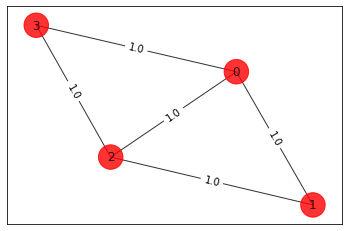

In [2]:
# Example from tutorial: https://qiskit.org/documentation/optimization/tutorials/06_examples_max_cut_and_tsp.html

# Generating a graph of 4 nodes

n = 4  # Number of nodes in graph
G = nx.Graph()
G.add_nodes_from(np.arange(0, n, 1))
elist = [(0, 1, 1.0), (0, 2, 1.0), (0, 3, 1.0), (1, 2, 1.0), (2, 3, 1.0)]

# tuple is (i,j,weight) where (i,j) is the edge
G.add_weighted_edges_from(elist)

colors = ["r" for node in G.nodes()]
pos = nx.spring_layout(G)


def draw_graph(G, colors, pos):
    default_axes = plt.axes(frameon=True)
    nx.draw_networkx(G, node_color=colors, node_size=600, alpha=0.8, ax=default_axes, pos=pos)
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)


draw_graph(G, colors, pos)

In [3]:
# Computing the weight matrix from the random graph
w = np.zeros([n, n])
for i in range(n):
    for j in range(n):
        temp = G.get_edge_data(i, j, default=0)
        if temp != 0:
            w[i, j] = temp["weight"]
print(w)

[[0. 1. 1. 1.]
 [1. 0. 1. 0.]
 [1. 1. 0. 1.]
 [1. 0. 1. 0.]]


In [4]:
# Mapping to the Ising problem

max_cut = Maxcut(w)                                 # <-- Maxcut class
qp = max_cut.to_quadratic_program()
print(qp.export_as_lp_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: Max-cut

Maximize
 obj: 3 x_0 + 2 x_1 + 3 x_2 + 2 x_3 + [ - 4 x_0*x_1 - 4 x_0*x_2 - 4 x_0*x_3
      - 4 x_1*x_2 - 4 x_2*x_3 ]/2
Subject To

Bounds
 0 <= x_0 <= 1
 0 <= x_1 <= 1
 0 <= x_2 <= 1
 0 <= x_3 <= 1

Binaries
 x_0 x_1 x_2 x_3
End



In [5]:
qubitOp, offset = qp.to_ising()
print("Offset:", offset)
print("Ising Hamiltonian:")
print(str(qubitOp))

Offset: -2.5
Ising Hamiltonian:
0.5 * IIZZ
+ 0.5 * IZIZ
+ 0.5 * IZZI
+ 0.5 * ZIIZ
+ 0.5 * ZZII


In [6]:
# solving Quadratic Program using exact classical eigensolver (NumPyMinimumEigensolver)

exact = MinimumEigenOptimizer(NumPyMinimumEigensolver())
result = exact.solve(qp)
print(result)

optimal function value: 4.0
optimal value: [1. 0. 1. 0.]
status: SUCCESS


energy: -1.5
max-cut objective: -4.0
solution: [1 0 1 0]
solution objective: 4.0


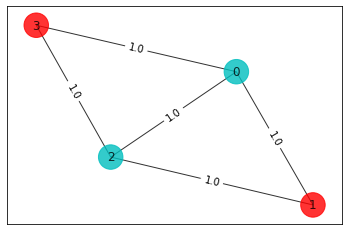

In [7]:
# Making the Hamiltonian in its full form and getting the lowest eigenvalue and eigenvector

ee = NumPyMinimumEigensolver()
result = ee.compute_minimum_eigenvalue(qubitOp)

x = max_cut.sample_most_likely(result.eigenstate)
print("energy:", result.eigenvalue.real)
print("max-cut objective:", result.eigenvalue.real + offset)
print("solution:", x)
print("solution objective:", qp.objective.evaluate(x))

colors = ["r" if x[i] == 0 else "c" for i in range(n)]
draw_graph(G, colors, pos)

In [8]:
# Running it on quantum computer

algorithm_globals.random_seed = 123
seed = 10598
backend = Aer.get_backend("aer_simulator_statevector")
quantum_instance = QuantumInstance(backend, seed_simulator=seed, seed_transpiler=seed)

energy: -1.4996861455587291
time: 6.202404737472534
max-cut objective: -3.999686145558729
solution: [0. 1. 0. 1.]
solution objective: 4.0


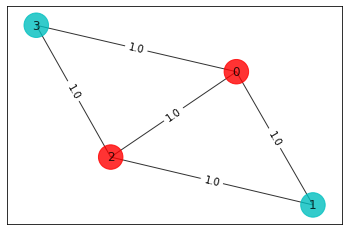

In [9]:
# construct VQE

spsa = SPSA(maxiter=300)
ry = TwoLocal(qubitOp.num_qubits, "ry", "cz", reps=5, entanglement="linear")
vqe = VQE(ry, optimizer=spsa, quantum_instance=quantum_instance)


# run VQE

result = vqe.compute_minimum_eigenvalue(qubitOp)


# print results

x = max_cut.sample_most_likely(result.eigenstate)
print("energy:", result.eigenvalue.real)
print("time:", result.optimizer_time)
print("max-cut objective:", result.eigenvalue.real + offset)
print("solution:", x)
print("solution objective:", qp.objective.evaluate(x))


# plot results

colors = ["r" if x[i] == 0 else "c" for i in range(n)]
draw_graph(G, colors, pos)

optimal function value: 4.0
optimal value: [1. 0. 1. 0.]
status: SUCCESS


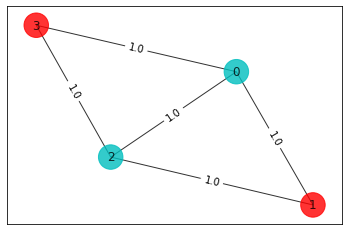

In [10]:
# create minimum eigen optimizer based on VQE
vqe_optimizer = MinimumEigenOptimizer(vqe)

# solve quadratic program
result = vqe_optimizer.solve(qp)                           # <-- ask to solve the problem
print(result)                                              # get same result as with the classical approach

colors = ["r" if result.x[i] == 0 else "c" for i in range(n)]
draw_graph(G, colors, pos)

<a id="quantum.mkcimpl"></a>
## Max-k-cut implementation

Below is the code that implements the **`Maxkcut` class**, which is the central part of this work.

As an example, I follow the same ways that are in the `Maxcut` class, and to define the cost function I used what is shown in the article from [Zsolt Tabi, et. al](https://doi.org/10.1109/QCE49297.2020.00018).

In [13]:
"""An application class for the Max-k-cut"""

from typing import List, Dict, Tuple, Optional, Union
import networkx as nx
import numpy as np
from docplex.mp.model import Model

from qiskit_optimization.algorithms import OptimizationResult
from qiskit_optimization.problems.quadratic_program import QuadraticProgram
from qiskit_optimization.translators import from_docplex_mp
from qiskit_optimization.applications import GraphOptimizationApplication

from matplotlib.pyplot import cm
from matplotlib.colors import to_rgba


class Maxkcut(GraphOptimizationApplication):
    """Optimization application for the "max-k-cut" [1] problem based 
       on a NetworkX graph.

    References:
        [1]: Z. Tabi et al.,
             "Quantum Optimization for the Graph Coloring Problem with
             Space-Efficient Embedding"
             2020 IEEE International Conference on Quantum Computing 
             and Engineering (QCE),
             2020, pp. 56-62, doi: 10.1109/QCE49297.2020.00018.,
             https://ieeexplore.ieee.org/document/9259934
    """

    def __init__(
        self,
        graph: Union[nx.Graph, np.ndarray, List],
        k: int,
        colors: Optional[Union[List[str], List[List[int]]]] = None,
    ) -> None:
        """
        Args:
            graph: A graph representing a problem. It can be specified directly as a
                `NetworkX <https://networkx.org/>`_ graph,
                or as an array or list format suitable to build out a NetworkX graph.
            k: The number of colors
            colors: List of strings or list of colors in rgba lists to be assigned to each
                resulting subset, there must be as many colors as the number k
        """
        super().__init__(graph=graph)
        self._subsets_num = k
        self._colors = colors if colors and len(colors) >= k else None

    def to_quadratic_program(self) -> QuadraticProgram:
        """Convert a Max-k-cut problem instance into a
        :class:`~qiskit_optimization.problems.QuadraticProgram`

        Returns:
            The :class:`~qiskit_optimization.problems.QuadraticProgram` created
            from the Max-k-cut problem instance.
        """
        for w, v in self._graph.edges:
            self._graph.edges[w, v].setdefault("weight", 1)

        mdl = Model(name="Max-k-cut")
        n = self._graph.number_of_nodes()
        k = self._subsets_num
        x = {(v, i): mdl.binary_var(name=f"x_{v}_{i}") for v in range(n) for i in range(k)}
        first_penalty = mdl.sum_squares((1 - mdl.sum(x[v, i] for i in range(k)) for v in range(n)))
        second_penalty = mdl.sum(
            mdl.sum(self._graph.edges[v, w]["weight"] * x[v, i] * x[w, i] for i in range(k))
            for v, w in self._graph.edges
        )
        objective = first_penalty + second_penalty
        mdl.minimize(objective)

        op = from_docplex_mp(mdl)
        return op

    def interpret(self, result: Union[OptimizationResult, np.ndarray]) -> List[List[int]]:
        """Interpret a result as k lists of node indices

        Args:
            result : The calculated result of the problem

        Returns:
            k lists of node indices correspond to k node sets for the Max-k-cut
        """
        x = self._result_to_x(result)
        n = self._graph.number_of_nodes()
        cut = [[] for i in range(self._subsets_num)]  # type: List[List[int]]

        n_selected = x.reshape((n, self._subsets_num))
        for i in range(n):
            node_in_subset = np.where(n_selected[i] == 1)[0]  # one-hot encoding
            if len(node_in_subset) != 0:
                cut[node_in_subset[0]].append(i)

        return cut

    def _draw_result(
        self,
        result: Union[OptimizationResult, np.ndarray],
        pos: Optional[Dict[int, np.ndarray]] = None,
    ) -> None:
        """Draw the result with colors

        Args:
            result : The calculated result for the problem
            pos: The positions of nodes
        """
        x = self._result_to_x(result)
        nx.draw(self._graph, node_color=self._node_color(x), pos=pos, with_labels=True)

    def _node_color(
        self, x: np.ndarray
    ) -> Union[List[Tuple[float, float, float, float]], List[str]]:
        # Return a list of colors for draw.

        n = self._graph.number_of_nodes()

        # k colors chosen (randomly or from cm.rainbow), or from given color list
        colors = (
            (
                cm.rainbow(np.linspace(0, 1, self._subsets_num))
            )
            if self._colors is None
            else self._colors
        )
        gray = to_rgba("lightgray")
        node_colors = [gray for _ in range(n)]

        n_selected = x.reshape((n, self._subsets_num))
        for i in range(n):
            node_in_subset = np.where(n_selected[i] == 1)  # one-hot encoding
            if len(node_in_subset[0]) != 0:
                node_colors[i] = (
                    to_rgba(colors[node_in_subset[0][0]])
                )

        return node_colors

    @property
    def k(self) -> int:
        """Getter of k

        Returns:
            The number of colors
        """
        return self._subsets_num

    @k.setter
    def k(self, k: int) -> None:
        """Setter of k

        Args:
            k: The number of colors
        """
        self._subsets_num = k
        self._colors = self._colors if self._colors and len(self._colors) >= k else None

    @property
    def colors(self) -> Union[List[str], List[List[int]]]:
        """Getter of colors list

        Returns:
            The k size color list
        """
        return self._colors

    @colors.setter
    def colors(self, colors: Union[List[str], List[List[int]]]) -> None:
        """Setter of colors list

        Args:
            colors: The k size color list
        """
        self._colors = colors if colors and len(colors) >= self._subsets_num else None


### General Description

The `Maxkcut` class receives in its constructor a `networkx` graph, or an `numpy.ndarray` or a `list` that defines the graph, and the second argument is the value of `k`, which indicates how many subgraphs are desired, optionally it accepts a list of colors that it will assign to each subgraph, so that when showing the graph it is evident how the cuts happened.

```python
max_k_cut = Maxkcut(graph, k, colors)
```

To solve the problem, as with the `Maxcut` class, it must be converted to a *Quadratic Program*, which will be used to send it to a solver (e.g. `NumPyMinimumEigensolver`, `QAOA`, or `VQE`).

```python
qp = max_k_cut.to_quadratic_program()
result = MinimumEigenOptimizer(solver).solve(qp)
```

### Important methods

In the `to_quadratic_program` method, the instance of the Maxkcut class is converted to a `QuadraticProgram`, for this I use the equation for $f(x)$ from [Zsolt Tabi, et. al](https://doi.org/10.1109/QCE49297.2020.00018) (named as (1) in this notebook).

The variable `first_penalty` contains the first term of said equation and $C=1$. While the `second_penalty` variable stores the second term, with $D=1$. The objective function is defined as the sum of both variables and since the problem posed for this equation is a *minimization*, this is how the model is created by doing `mdl.minimize(objective)`.

In the `interpret` method, the results are interpreted considering the *one-hot encoding* that includes the approach made by [Zsolt Tabi, et. al](https://doi.org/10.1109/QCE49297.2020.00018).

The `_draw_result` method calls the `_node_color` method and they are in charge of drawing the resulting graph, that is, with the corresponding colors that highlight the final subsets.

<a id="quantum.mkcimpl.ex"></a>
## Max-k-cut Example

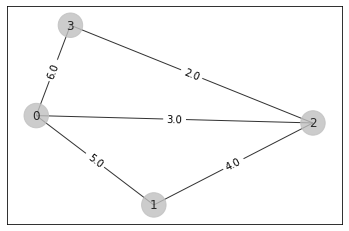

In [57]:
# Generating a graph of 4 nodes
n = 4
k = 3
G = nx.Graph()
G.add_nodes_from(np.arange(0, n, 1))
elist = [(0, 1, 5.0), (0, 2, 3.0), (0, 3, 6.0), (1, 2, 4.0), (2, 3, 2.0)]
G.add_weighted_edges_from(elist)
pos = nx.spring_layout(G)

colors = ["silver" for node in G.nodes()]

draw_graph(G, colors, pos)

In [53]:
colors=['skyblue', 'limegreen', 'salmon']

max_k_cut = Maxkcut(G, k, colors)

qp = max_k_cut.to_quadratic_program()

print(qp.export_as_lp_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: Max-k-cut

Minimize
 obj: - 2 x_0_0 - 2 x_0_1 - 2 x_0_2 - 2 x_1_0 - 2 x_1_1 - 2 x_1_2 - 2 x_2_0
      - 2 x_2_1 - 2 x_2_2 - 2 x_3_0 - 2 x_3_1 - 2 x_3_2 + [ 2 x_0_0^2
      + 4 x_0_0*x_0_1 + 4 x_0_0*x_0_2 + 10 x_0_0*x_1_0 + 6 x_0_0*x_2_0
      + 12 x_0_0*x_3_0 + 2 x_0_1^2 + 4 x_0_1*x_0_2 + 10 x_0_1*x_1_1
      + 6 x_0_1*x_2_1 + 12 x_0_1*x_3_1 + 2 x_0_2^2 + 10 x_0_2*x_1_2
      + 6 x_0_2*x_2_2 + 12 x_0_2*x_3_2 + 2 x_1_0^2 + 4 x_1_0*x_1_1
      + 4 x_1_0*x_1_2 + 8 x_1_0*x_2_0 + 2 x_1_1^2 + 4 x_1_1*x_1_2
      + 8 x_1_1*x_2_1 + 2 x_1_2^2 + 8 x_1_2*x_2_2 + 2 x_2_0^2 + 4 x_2_0*x_2_1
      + 4 x_2_0*x_2_2 + 4 x_2_0*x_3_0 + 2 x_2_1^2 + 4 x_2_1*x_2_2
      + 4 x_2_1*x_3_1 + 2 x_2_2^2 + 4 x_2_2*x_3_2 + 2 x_3_0^2 + 4 x_3_0*x_3_1
      + 4 x_3_0*x_3_2 + 2 x_3_1^2 + 4 x_3_1*x_3_2 + 2 x_3_2^2 ]/2 + 4
Subject To

Bounds
 0 <= x_0_0 <= 1
 0 <= x_0_1 <= 1
 0 <= x_0_2 <= 1
 0 <= x_1_0 <= 1
 0 <= x_1_1 <= 1
 0 <= x_1_2 <= 1
 0

<a id="quantum.solving.classic"></a>
### Solve with `NumPyMinimumEigensolver`

In [54]:
# NumPy solver
exact_solver = NumPyMinimumEigensolver()

In [55]:
result = MinimumEigenOptimizer(exact_solver).solve(qp)
print(result)
print(max_k_cut.interpret(result=result))

optimal function value: 0.0
optimal value: [0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0.]
status: SUCCESS
[[2], [1, 3], [0]]


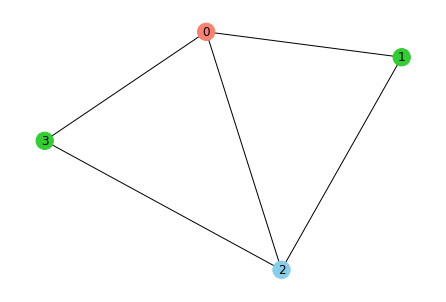

In [56]:
pos = nx.spring_layout(G)
max_k_cut.draw(result=result, pos=pos)

<a id="quantum.solving.qaoa"></a>
### Solve with `QAOA`

In [58]:
# QAOA solver
qaoa_solver = QAOA(reps=1, quantum_instance=quantum_instance)

In [61]:
result = MinimumEigenOptimizer(qaoa_solver).solve(qp)
print(result)
print(max_k_cut.interpret(result=result))

optimal function value: 0.0
optimal value: [0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.]
status: SUCCESS
[[1, 3], [2], [0]]


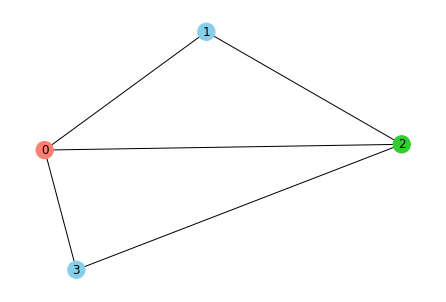

In [60]:
pos = nx.spring_layout(G)
max_k_cut.draw(result=result, pos=pos)

<a id="quantum.solving.vqe"></a>
### Solve with `VQE`

In [63]:
spsa = SPSA(maxiter=300)
ry = TwoLocal(qubitOp.num_qubits, "ry", "cz", reps=5, entanglement="linear")
vqe_solver = VQE(ry, optimizer=spsa, quantum_instance=quantum_instance)

In [64]:
result = MinimumEigenOptimizer(vqe_solver).solve(qp)
print(result)
print(max_k_cut.interpret(result=result))

optimal function value: 0.0
optimal value: [0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.]
status: SUCCESS
[[1, 3], [0], [2]]


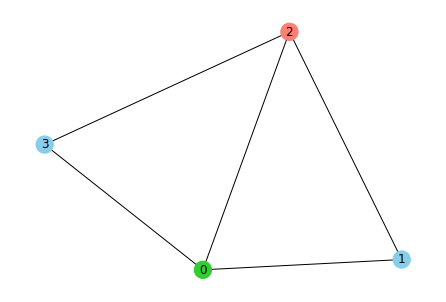

In [65]:
pos = nx.spring_layout(G)
max_k_cut.draw(result=result, pos=pos)

<a id="quantum.solving.bigger"></a>
### Bigger Example

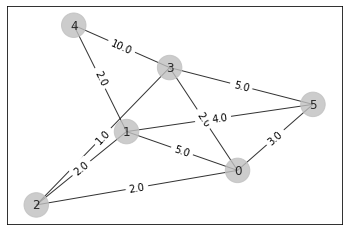

In [86]:
# Generating a graph of 10 nodes
n = 6
k = 3
G = nx.Graph()
G.add_nodes_from(np.arange(0, n, 1))
elist = [(0, 1, 5.0), (0, 2, 2.0), (0, 3, 2.0), (0, 5, 3.0), (1, 2, 2.0), 
         (1, 4, 2.0), (1, 5, 4.0), (2, 3, 1.0), (3, 4, 10.0), (3, 5, 5.0)]
G.add_weighted_edges_from(elist)
pos = nx.spring_layout(G)

algorithm_globals.massive = True  # To be able to execute large graphs

colors = ["silver" for node in G.nodes()]

draw_graph(G, colors, pos)

In [87]:
colors=['skyblue', 'limegreen', 'salmon']

max_k_cut = Maxkcut(G, k, colors)

qp = max_k_cut.to_quadratic_program()

print(qp.export_as_lp_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: Max-k-cut

Minimize
 obj: - 2 x_0_0 - 2 x_0_1 - 2 x_0_2 - 2 x_1_0 - 2 x_1_1 - 2 x_1_2 - 2 x_2_0
      - 2 x_2_1 - 2 x_2_2 - 2 x_3_0 - 2 x_3_1 - 2 x_3_2 - 2 x_4_0 - 2 x_4_1
      - 2 x_4_2 - 2 x_5_0 - 2 x_5_1 - 2 x_5_2 + [ 2 x_0_0^2 + 4 x_0_0*x_0_1
      + 4 x_0_0*x_0_2 + 10 x_0_0*x_1_0 + 4 x_0_0*x_2_0 + 4 x_0_0*x_3_0
      + 6 x_0_0*x_5_0 + 2 x_0_1^2 + 4 x_0_1*x_0_2 + 10 x_0_1*x_1_1
      + 4 x_0_1*x_2_1 + 4 x_0_1*x_3_1 + 6 x_0_1*x_5_1 + 2 x_0_2^2
      + 10 x_0_2*x_1_2 + 4 x_0_2*x_2_2 + 4 x_0_2*x_3_2 + 6 x_0_2*x_5_2
      + 2 x_1_0^2 + 4 x_1_0*x_1_1 + 4 x_1_0*x_1_2 + 4 x_1_0*x_2_0
      + 4 x_1_0*x_4_0 + 8 x_1_0*x_5_0 + 2 x_1_1^2 + 4 x_1_1*x_1_2
      + 4 x_1_1*x_2_1 + 4 x_1_1*x_4_1 + 8 x_1_1*x_5_1 + 2 x_1_2^2
      + 4 x_1_2*x_2_2 + 4 x_1_2*x_4_2 + 8 x_1_2*x_5_2 + 2 x_2_0^2
      + 4 x_2_0*x_2_1 + 4 x_2_0*x_2_2 + 2 x_2_0*x_3_0 + 2 x_2_1^2
      + 4 x_2_1*x_2_2 + 2 x_2_1*x_3_1 + 2 x_2_2^2 + 2 x_2_2*x_3_2 + 

In [88]:
result = MinimumEigenOptimizer(exact_solver).solve(qp)
print(result)
print(max_k_cut.interpret(result=result))

optimal function value: 0.0
optimal value: [0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0.]
status: SUCCESS
[[2, 4, 5], [0], [1, 3]]


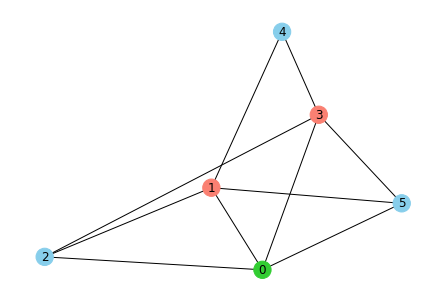

In [89]:
pos = nx.spring_layout(G)
max_k_cut.draw(result=result, pos=pos)

<a id="apps"></a>
# Applications

Many industrial applications can be formulated as the max-k-cut problem, including:

- VLSI layout design (very large-scale integration)
  - F. Barahona, M. Grotschel, M. Jünger, and G. Reinelt. An application of combinatorial optimization to statistical physics and circuit layout design. Operations Research, 36(3):493–513, 1988.
- Statistical physics
  - F. Liers, M. Junger, G. Reinelt, and G. Rinaldi. Computing exact ground states of hard Ising spin glass problems by branch-and-cut. In New Optimization Algorithms in Physics, pages 47–69. Wiley-VCH Verlag GmbH & Co. KGaA, 2005
- Wireless communication problems
  - J. Fairbrother, A. N. Letchford, and K. Briggs. A two-level graph partitioning problem arising in mobile wireless communications. Computational Optimization and Applications, 69(3):653–676, 2018.
  - C. Niu, Y. Li, R. Qingyang Hu, and F. Ye. Femtocell-enhanced multi-target spectrum allocation strategy in LTE-A HetNets. IET Communications, 11(6):887–896, 2017.


<a id="conclusions"></a>
# Conclusions

- I have been able to implement a model that was not originally generated for the max-k-cut problem, but by finding the similarity with another type of optimization problem, it is that we can take advantage of the investigations that are carried out under different perspectives.
- The next thing is to continue improving the implementation, in particular, what I have done here can surely be improved, for this, it is necessary to carry out many more tests and thus be able to correct possible bugs.
- In addition to the applications mentioned above, there are many others, some that I can't even imagine at this time, the important thing is to generate solutions that allow people who face problems in their respective areas, to have alternatives to solve their problems.
- The impact on society has not yet been seen directly, since we do not have conclusive proof of the advantages of solving optimization problems in quantum computers over classical computers. But in general, the optimization problems, including the max-k-cut problem, will always benefit us because they help us take advantage of the resources that we have at our disposal.

<a id="refs"></a>
# References

- [Optimization problem](https://en.wikipedia.org/wiki/Optimization_problem). From Wikipedia, the free encyclopedia
- [Max-Cut and Traveling Salesman Problem](https://qiskit.org/documentation/optimization/tutorials/06_examples_max_cut_and_tsp.html), Qiskit Docs, Optimization Tutorials
- [Computational study of valid inequalities for the maximum k-cut problem](https://link.springer.com/article/10.1007/s10479-017-2448-9), Rodrigues de Sousa, V.J., Anjos, M.F. & Le Digabel, S. Ann Oper Res 265, 5–27 (2018). https://doi.org/10.1007/s10479-017-2448-9
- [Quantum Optimization for the Graph Coloring Problem with Space-Efficient Embedding](https://ieeexplore.ieee.org/document/9259934). Z. Tabi et al., 2020 IEEE International Conference on Quantum Computing and Engineering (QCE), 2020, pp. 56-62, https://doi.org/10.1109/QCE49297.2020.00018
- [Graph coloring](https://en.wikipedia.org/wiki/Graph_coloring). From Wikipedia, the free encyclopedia
- [The maximum k-colorable subgraph problem and related problems](https://arxiv.org/pdf/2001.09644.pdf), O. Kuryatnikova, R. Sotirov, J. C. Vera. https://doi.org/10.48550/arXiv.2001.09644
- [On Approximate Graph Colouring and MAX-k-CUT Algorithms Based on the θ-Function](https://link.springer.com/article/10.1023/B:JOCO.0000038911.67280.3f), E. de Klerk, D.V. Pasechnik & J.P. Warners. Journal of Combinatorial Optimization 8, 267–294 (2004), https://doi.org/10.1023/B:JOCO.0000038911.67280.3f
- [Improving the linear relaxation of maximum k-cut with semidefinite-based constraints](https://link.springer.com/article/10.1007/s13675-019-00110-y), Rodrigues de Sousa, V.J., Anjos, M.F. & Le Digabel, S. EURO J Comput Optim 7, 123–151 (2019). https://doi.org/10.1007/s13675-019-00110-y